# FRAUD DETECTION

## Importing Necessary Libraries

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import tensorflow as tf
from joblib import dump
from sklearn.metrics import (classification_report, confusion_matrix, 
                             precision_score, recall_score, f1_score, 
                             roc_auc_score, roc_curve, precision_recall_curve,
                             accuracy_score)
import warnings
warnings.filterwarnings('ignore')

## Load and Inspect Data

In [2]:
#read the data

fd = pd.read_csv(r"D:\BIA\Capstone_Project_Fraud\Fraud_Analysis_Dataset.csv")

In [3]:
fd.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1
1,1,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1
2,1,TRANSFER,2806.0,C1420196421,2806.0,0.0,C972765878,0.0,0.0,1
3,1,CASH_OUT,2806.0,C2101527076,2806.0,0.0,C1007251739,26202.0,0.0,1
4,1,TRANSFER,20128.0,C137533655,20128.0,0.0,C1848415041,0.0,0.0,1


In [4]:
fd.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,11142.000000,1.114200e+04,1.114200e+04,1.114200e+04,1.114200e+04,1.114200e+04,11142.000000
mean,8.717645,2.131915e+05,9.241173e+05,8.249576e+05,8.883541e+05,1.103211e+06,0.102495
std,16.067479,7.600650e+05,2.143004e+06,2.089894e+06,2.601376e+06,2.982447e+06,0.303312
min,1.000000,2.390000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,2.000000,4.946618e+03,4.270000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
50%,6.000000,1.676126e+04,2.816950e+04,4.420605e+03,0.000000e+00,0.000000e+00,0.000000
75%,7.000000,1.543366e+05,3.040855e+05,1.114126e+05,2.711555e+05,3.186374e+05,0.000000
max,95.000000,1.000000e+07,1.990000e+07,1.300000e+07,3.300000e+07,3.460000e+07,1.000000


In [5]:
fd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11142 entries, 0 to 11141
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            11142 non-null  int64  
 1   type            11142 non-null  object 
 2   amount          11142 non-null  float64
 3   nameOrig        11142 non-null  object 
 4   oldbalanceOrg   11142 non-null  float64
 5   newbalanceOrig  11142 non-null  float64
 6   nameDest        11142 non-null  object 
 7   oldbalanceDest  11142 non-null  float64
 8   newbalanceDest  11142 non-null  float64
 9   isFraud         11142 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 870.6+ KB


In [6]:
fd.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

##  EDA

In [7]:
# Fraud Distribution
print("Fraud Distribution:\n")
print(fd['isFraud'].value_counts())

print(f"\nFraud Percentage: {fd['isFraud'].mean()*100:.2f}%")

Fraud Distribution:

isFraud
0    10000
1     1142
Name: count, dtype: int64

Fraud Percentage: 10.25%


In [8]:
#Transaction types
print('Types of  transactions:')
fd['type'].value_counts()

Types of  transactions:


type
PAYMENT     5510
CASH_IN     1951
CASH_OUT    1871
TRANSFER    1464
DEBIT        346
Name: count, dtype: int64

In [9]:
# Fraud by transsaction types

print(f"Fraud by Transaction Type:\n")
fraud_by_type = fd.groupby('type')['isFraud'].agg(['sum', 'count', 'mean'])
fraud_by_type.columns = ['Fraud_Count', 'Total_Count', 'Fraud_Rate']
print(fraud_by_type)

Fraud by Transaction Type:

          Fraud_Count  Total_Count  Fraud_Rate
type                                          
CASH_IN             0         1951    0.000000
CASH_OUT          578         1871    0.308926
DEBIT               0          346    0.000000
PAYMENT             0         5510    0.000000
TRANSFER          564         1464    0.385246


## Visualizations

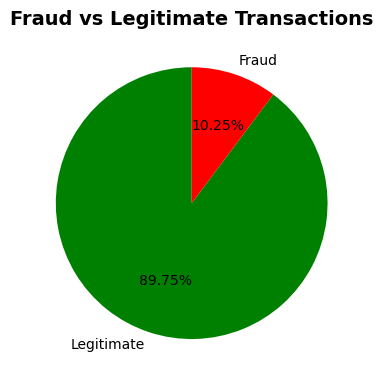

In [10]:
# Fraud distributions

plt.figure(figsize = (20, 15))
ax1 = plt.subplot(3, 3, 1)
fraud_counts = fd['isFraud'].value_counts()
colors = ['green', 'red']
plt.pie(fraud_counts, labels = ['Legitimate', 'Fraud'], autopct='%1.2f%%', 
        colors=colors, startangle=90)
plt.title('Fraud vs Legitimate Transactions', fontsize = 14, fontweight = 'bold')
plt.savefig('eda_visualizations_1.png', dpi=300, bbox_inches='tight')
plt.show()

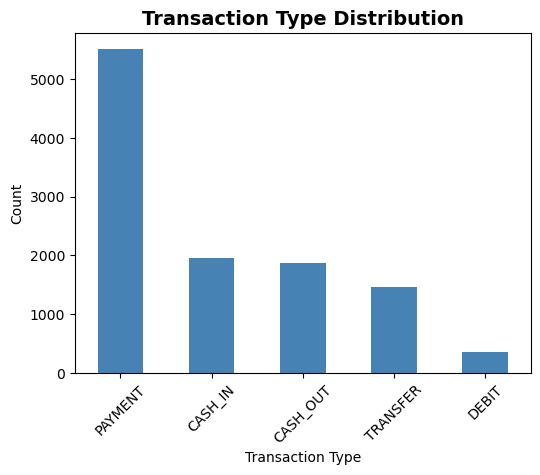

In [11]:
#  Transaction Type Distribution

plt.figure(figsize=(20, 15))
ax2 = plt.subplot(3, 3, 2)
fd['type'].value_counts().plot(kind = 'bar', color = 'steelblue')
plt.title('Transaction Type Distribution', fontsize = 14, fontweight = 'bold')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.xticks(rotation = 45)
plt.show()

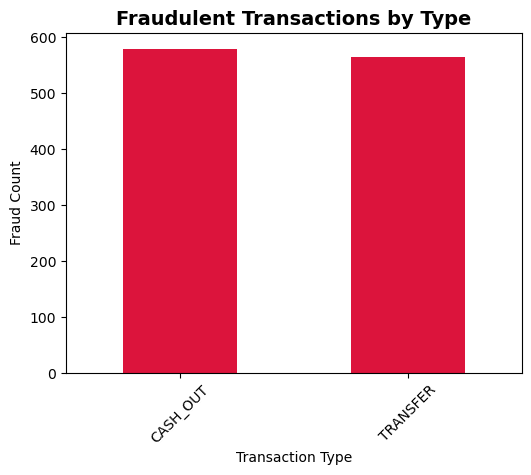

In [12]:
#  Fraud by Transaction Type

plt.figure(figsize = (20,15))
ax3 = plt.subplot(3, 3, 3)
fraud_type = fd[fd['isFraud'] == 1]['type'].value_counts()
fraud_type.plot(kind = 'bar', color = 'crimson')
plt.title('Fraudulent Transactions by Type', fontsize = 14, fontweight = 'bold')
plt.xlabel('Transaction Type')
plt.ylabel('Fraud Count')
plt.xticks(rotation = 45)
plt.savefig('eda_visualizations_2.png', dpi=300, bbox_inches='tight')
plt.show()

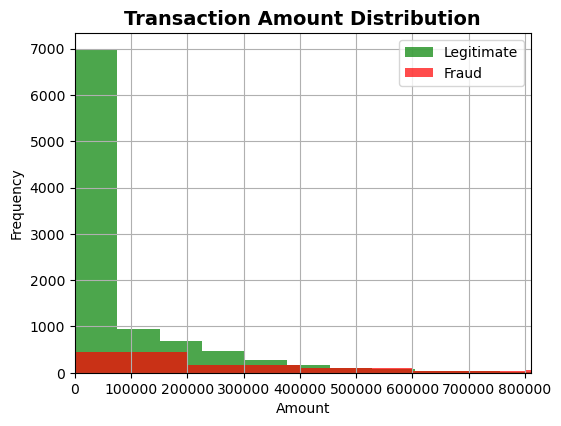

In [13]:
#  Amount Distribution (Legitimate vs Fraud)

plt.figure(figsize = (20,15))
ax4 = plt.subplot(3, 3, 4)
fd[fd['isFraud'] == 0]['amount'].hist(bins = 50, alpha = 0.7, label = 'Legitimate', color = 'green')
fd[fd['isFraud'] == 1]['amount'].hist(bins = 50, alpha = 0.7, label = 'Fraud', color = 'red')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.title('Transaction Amount Distribution', fontsize = 14, fontweight = 'bold')
plt.legend()
plt.xlim(0, fd['amount'].quantile(0.95))
plt.show()

(0.0, 810039.19)

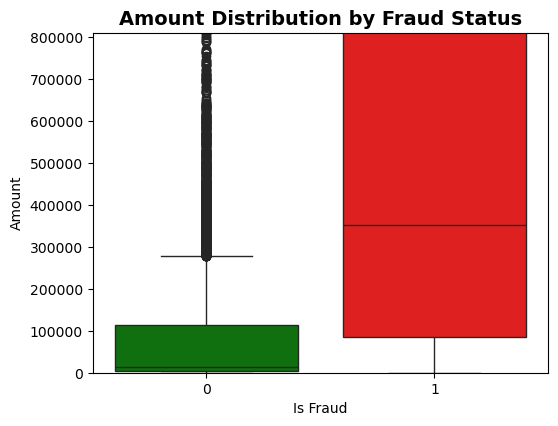

In [14]:
#  Amount Box Plot

plt.figure(figsize = (20,15))
ax5 = plt.subplot(3, 3, 5)
sns.boxplot(data = fd, x = 'isFraud', y = 'amount', palette = {'0': 'green', '1': 'red'})
plt.title('Amount Distribution by Fraud Status', fontsize = 14, fontweight = 'bold')
plt.xlabel('Is Fraud')
plt.ylabel('Amount')
plt.ylim(0, fd['amount'].quantile(0.95))


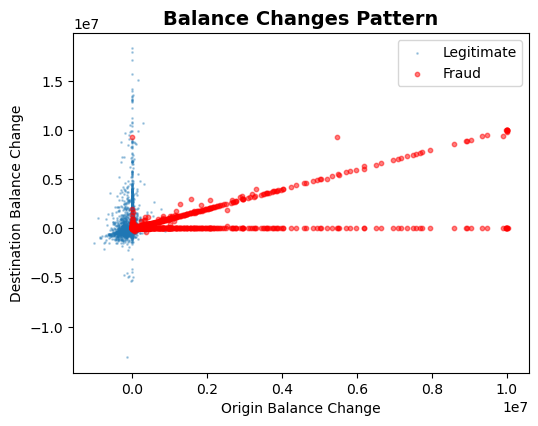

In [15]:
#  Balance Changes

plt.figure(figsize = (20,15))
ax6 = plt.subplot(3, 3, 6)
fd['balance_change_orig'] = fd['oldbalanceOrg'] - fd['newbalanceOrig']
fd['balance_change_dest'] = fd['newbalanceDest'] - fd['oldbalanceDest']
plt.scatter(fd[fd['isFraud']==0]['balance_change_orig'], 
           fd[fd['isFraud']==0]['balance_change_dest'], 
           alpha=0.3, label='Legitimate', s=1)
plt.scatter(fd[fd['isFraud']==1]['balance_change_orig'], 
           fd[fd['isFraud']==1]['balance_change_dest'], 
           alpha=0.5, label='Fraud', s=10, color='red')
plt.xlabel('Origin Balance Change')
plt.ylabel('Destination Balance Change')
plt.title('Balance Changes Pattern', fontsize=14, fontweight='bold')
plt.legend()
plt.show()

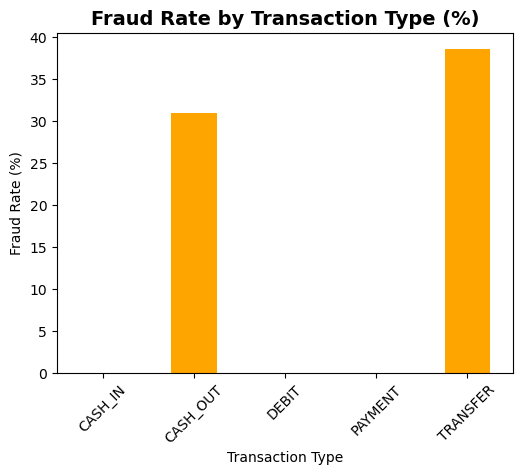

In [16]:
# 7. Fraud Rate by Transaction Type

plt.figure(figsize = (20,15))
ax7 = plt.subplot(3, 3, 7)
fraud_rate = fd.groupby('type')['isFraud'].mean() * 100
fraud_rate.plot(kind='bar', color='orange')
plt.title('Fraud Rate by Transaction Type (%)', fontsize=14, fontweight='bold')
plt.xlabel('Transaction Type')
plt.ylabel('Fraud Rate (%)')
plt.xticks(rotation=45)
plt.show()

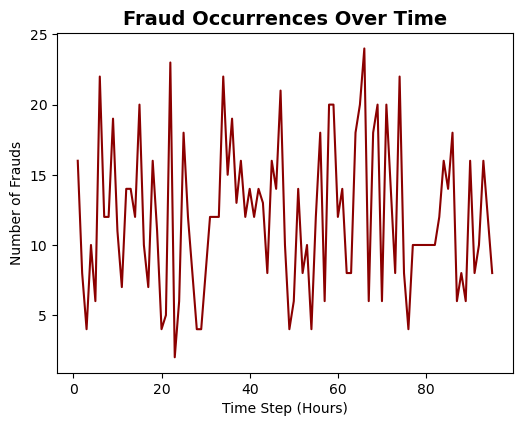

In [17]:
#  Time Step Analysis

plt.figure(figsize = (20,15))
ax8 = plt.subplot(3, 3, 8)
time_fraud = fd.groupby('step')['isFraud'].sum()
time_fraud.plot(color='darkred')
plt.title('Fraud Occurrences Over Time', fontsize=14, fontweight='bold')
plt.xlabel('Time Step (Hours)')
plt.ylabel('Number of Frauds')
plt.show()

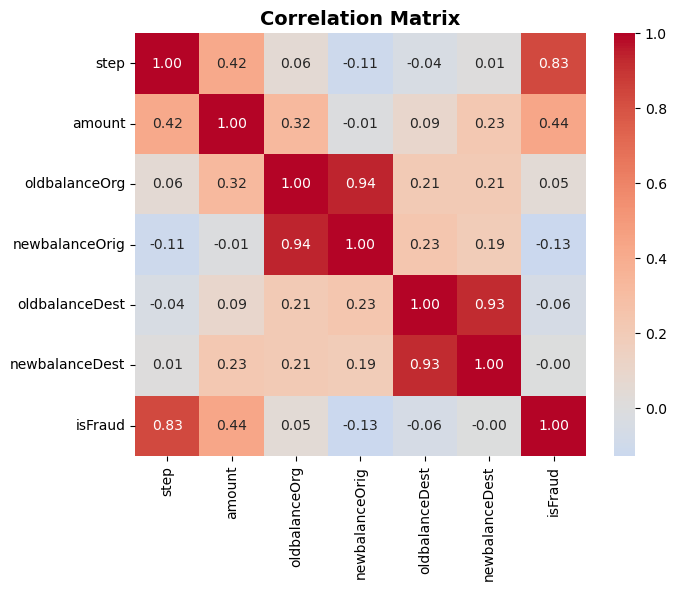

In [18]:
#  Correlation Heatmap

plt.figure(figsize = (20,15))
ax9 = plt.subplot(3, 3, 9)
numeric_cols = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 
                'oldbalanceDest', 'newbalanceDest', 'isFraud']
corr_matrix = fd[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Correlation Matrix', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('eda_visualizations3.png', dpi=300, bbox_inches='tight')
plt.show()

## Feature Engineering

In [19]:
# Create a copy for feature engineering
df_fe = fd.copy()
df_fe.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,balance_change_orig,balance_change_dest
0,1,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1,181.0,0.0
1,1,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1,181.0,-21182.0
2,1,TRANSFER,2806.0,C1420196421,2806.0,0.0,C972765878,0.0,0.0,1,2806.0,0.0
3,1,CASH_OUT,2806.0,C2101527076,2806.0,0.0,C1007251739,26202.0,0.0,1,2806.0,-26202.0
4,1,TRANSFER,20128.0,C137533655,20128.0,0.0,C1848415041,0.0,0.0,1,20128.0,0.0


In [20]:
# 1. Balance-related features
df_fe['orig_balance_change'] = df_fe['oldbalanceOrg'] - df_fe['newbalanceOrig']
df_fe['dest_balance_change'] = df_fe['newbalanceDest'] - df_fe['oldbalanceDest']

In [21]:
# 2. Error features (inconsistency detection)
df_fe['error_balance_orig'] = df_fe['newbalanceOrig'] + df_fe['amount'] - df_fe['oldbalanceOrg']
df_fe['error_balance_dest'] = df_fe['oldbalanceDest'] + df_fe['amount'] - df_fe['newbalanceDest']

In [22]:
# 3. Ratio features
df_fe['amount_to_oldbalance_orig'] = df_fe['amount'] / (df_fe['oldbalanceOrg'] + 1)
df_fe['amount_to_oldbalance_dest'] = df_fe['amount'] / (df_fe['oldbalanceDest'] + 1)

In [23]:
# 4. Binary features
df_fe['is_orig_balance_zero'] = (df_fe['oldbalanceOrg'] == 0).astype(int)
df_fe['is_dest_balance_zero'] = (df_fe['oldbalanceDest'] == 0).astype(int)
df_fe['is_merchant'] = df_fe['nameDest'].str.startswith('M').astype(int)


In [24]:
# 5. Transaction type encoding
df_fe['type_encoded'] = LabelEncoder().fit_transform(df_fe['type'])

In [25]:
# 6. Hour of day (circular encoding)
df_fe['hour_sin'] = np.sin(2 * np.pi * df_fe['step'] / 24)
df_fe['hour_cos'] = np.cos(2 * np.pi * df_fe['step'] / 24)

In [26]:
# Create dummy variables for transaction type
type_dummies = pd.get_dummies(df_fe['type'], prefix='type')
df_fe = pd.concat([df_fe, type_dummies], axis=1)

In [27]:
print("\nNew features created:")
new_features = ['orig_balance_change', 'dest_balance_change', 'error_balance_orig', 
                'error_balance_dest', 'amount_to_oldbalance_orig', 
                'amount_to_oldbalance_dest', 'is_orig_balance_zero', 
                'is_dest_balance_zero', 'is_merchant', 'hour_sin', 'hour_cos']

for feat in new_features:
    print(f"  - {feat}")

print(f"\nTotal features after engineering: {df_fe.shape[1]}")


New features created:
  - orig_balance_change
  - dest_balance_change
  - error_balance_orig
  - error_balance_dest
  - amount_to_oldbalance_orig
  - amount_to_oldbalance_dest
  - is_orig_balance_zero
  - is_dest_balance_zero
  - is_merchant
  - hour_sin
  - hour_cos

Total features after engineering: 29


## Data Preparation for Modeling

In [28]:
# Select features for modeling

df_fe.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'balance_change_orig', 'balance_change_dest', 'orig_balance_change',
       'dest_balance_change', 'error_balance_orig', 'error_balance_dest',
       'amount_to_oldbalance_orig', 'amount_to_oldbalance_dest',
       'is_orig_balance_zero', 'is_dest_balance_zero', 'is_merchant',
       'type_encoded', 'hour_sin', 'hour_cos', 'type_CASH_IN', 'type_CASH_OUT',
       'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER'],
      dtype='object')

In [29]:
feature_cols = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest',
                'orig_balance_change', 'dest_balance_change', 'error_balance_orig', 'error_balance_dest', 
                'amount_to_oldbalance_orig', 'amount_to_oldbalance_dest', 'is_orig_balance_zero', 
                'is_dest_balance_zero', 'is_merchant', 'hour_sin', 'hour_cos', 'type_CASH_IN', 'type_CASH_OUT', 
                'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER']

In [30]:
feature_cols

['step',
 'amount',
 'oldbalanceOrg',
 'newbalanceOrig',
 'oldbalanceDest',
 'newbalanceDest',
 'orig_balance_change',
 'dest_balance_change',
 'error_balance_orig',
 'error_balance_dest',
 'amount_to_oldbalance_orig',
 'amount_to_oldbalance_dest',
 'is_orig_balance_zero',
 'is_dest_balance_zero',
 'is_merchant',
 'hour_sin',
 'hour_cos',
 'type_CASH_IN',
 'type_CASH_OUT',
 'type_DEBIT',
 'type_PAYMENT',
 'type_TRANSFER']

In [31]:
X = df_fe[feature_cols]
y = df_fe['isFraud']

In [32]:
print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"\nClass distribution:")
print(y.value_counts())
print(f"Fraud ratio: {y.mean()*100:.2f}%")

Features shape: (11142, 22)
Target shape: (11142,)

Class distribution:
isFraud
0    10000
1     1142
Name: count, dtype: int64
Fraud ratio: 10.25%


In [33]:
from imblearn.over_sampling import SMOTE

# 1. Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 2. Apply SMOTE ONLY on training set
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

In [34]:
#pip install --upgrade imbalanced-learn scikit-learn

In [35]:
print(f"\nTrain set size: {X_train.shape[0]:,}")
print(f"Test set size: {X_test.shape[0]:,}")


Train set size: 15,998
Test set size: 2,229


In [36]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Model Training & Evaluation

In [37]:
# Dictionary to store results
results = {}

# Function to evaluate model
def evaluate_model(name, model, X_train, X_test, y_train, y_test):
    print(f"\n{'='*60}")
    print(f"Training {name}...")
    print('='*60)
    
    # Train
    model.fit(X_train, y_train)
    
    # Predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None
    
    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    
    print(f"\n{name} Results:")
    print(f"  Accuracy:  {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall:    {recall:.4f}")
    print(f"  F1-Score:  {f1:.4f}")
    if roc_auc:
        print(f"  ROC-AUC:   {roc_auc:.4f}")
    
    print(f"\nConfusion Matrix:")
    print(f"  True Negatives:  {tn:,}")
    print(f"  False Positives: {fp:,}")
    print(f"  False Negatives: {fn:,}")
    print(f"  True Positives:  {tp:,}")

    labels = ['No', 'Yes']
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=labels, yticklabels=labels)
    plt.show()
    
    # Store results
    results[name] = {
        'model': model,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'roc_auc': roc_auc,
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba,
        'cm': cm
    }
    
    return model

In [38]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression


Training Logistic Regression...

Logistic Regression Results:
  Accuracy:  0.9951
  Precision: 0.9865
  Recall:    0.9649
  F1-Score:  0.9756
  ROC-AUC:   0.9985

Confusion Matrix:
  True Negatives:  1,998
  False Positives: 3
  False Negatives: 8
  True Positives:  220


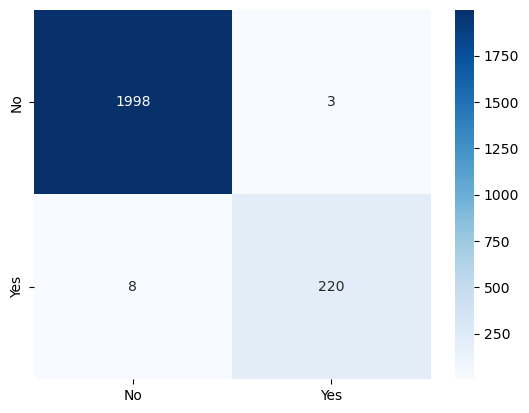

In [39]:
lr_model = evaluate_model(
    "Logistic Regression",
    LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced'),
    X_train_scaled, X_test_scaled, y_train, y_test
)

In [40]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


Training Random Forest...

Random Forest Results:
  Accuracy:  0.9996
  Precision: 1.0000
  Recall:    0.9956
  F1-Score:  0.9978
  ROC-AUC:   1.0000

Confusion Matrix:
  True Negatives:  2,001
  False Positives: 0
  False Negatives: 1
  True Positives:  227


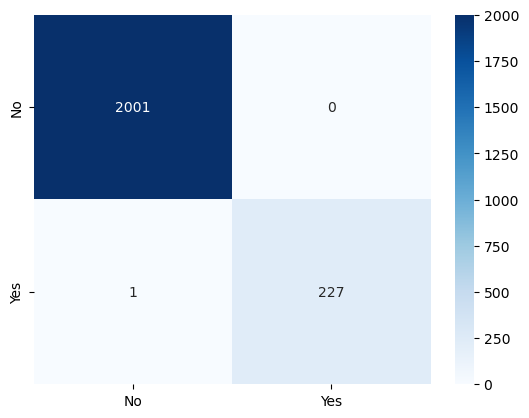

In [41]:
# Random Forest
rf_model = evaluate_model(
    "Random Forest",
    RandomForestClassifier(n_estimators=100, random_state=42, max_depth=15, 
                          class_weight='balanced', n_jobs=-1),
    X_train, X_test, y_train, y_test
)


Training Gradient Boosting...

Gradient Boosting Results:
  Accuracy:  0.9996
  Precision: 1.0000
  Recall:    0.9956
  F1-Score:  0.9978
  ROC-AUC:   1.0000

Confusion Matrix:
  True Negatives:  2,001
  False Positives: 0
  False Negatives: 1
  True Positives:  227


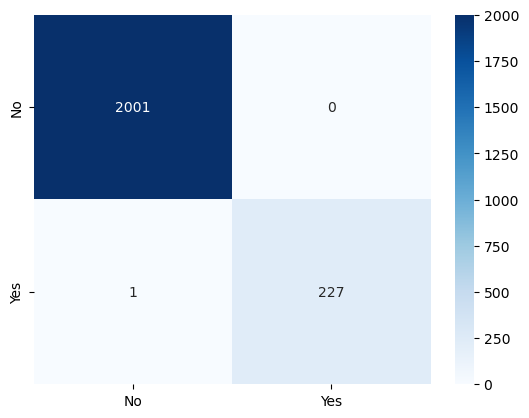

In [42]:
# Gradient Boosting
gb_model = evaluate_model(
    "Gradient Boosting",
    GradientBoostingClassifier(n_estimators=100, random_state=42, max_depth=7, 
                               learning_rate=0.1),
    X_train, X_test, y_train, y_test
)

In [43]:
from sklearn.tree import DecisionTreeClassifier


Training Decision Tree...

Decision Tree Results:
  Accuracy:  0.9987
  Precision: 1.0000
  Recall:    0.9868
  F1-Score:  0.9934
  ROC-AUC:   0.9978

Confusion Matrix:
  True Negatives:  2,001
  False Positives: 0
  False Negatives: 3
  True Positives:  225


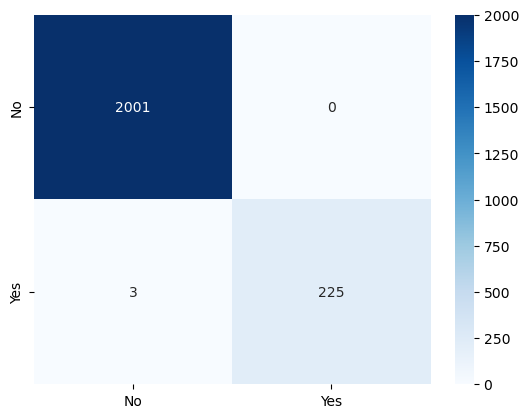

In [44]:
# Decision Tree
dt_model = evaluate_model(
    "Decision Tree",
    DecisionTreeClassifier(random_state=42, max_depth=10, class_weight='balanced'),
    X_train, X_test, y_train, y_test
)

In [45]:
from sklearn.svm import SVC


Training SVM...

SVM Results:
  Accuracy:  0.9933
  Precision: 0.9776
  Recall:    0.9561
  F1-Score:  0.9667

Confusion Matrix:
  True Negatives:  1,996
  False Positives: 5
  False Negatives: 10
  True Positives:  218


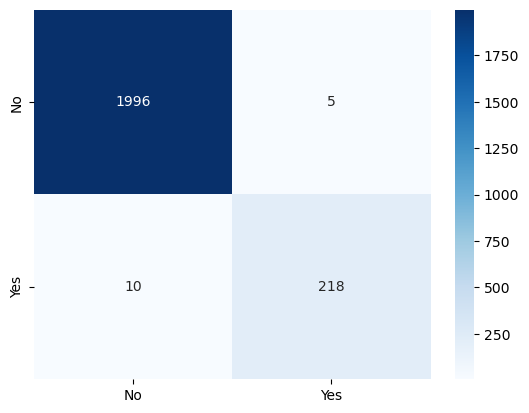

In [46]:
#SVM
svm_model = evaluate_model(
    "SVM",
    SVC(random_state=42, max_iter=1000, class_weight='balanced'),
    X_train_scaled, X_test_scaled, y_train, y_test
)

In [47]:
from sklearn.ensemble import AdaBoostClassifier


Training AdaBoost...

AdaBoost Results:
  Accuracy:  0.9991
  Precision: 0.9956
  Recall:    0.9956
  F1-Score:  0.9956
  ROC-AUC:   0.9996

Confusion Matrix:
  True Negatives:  2,000
  False Positives: 1
  False Negatives: 1
  True Positives:  227


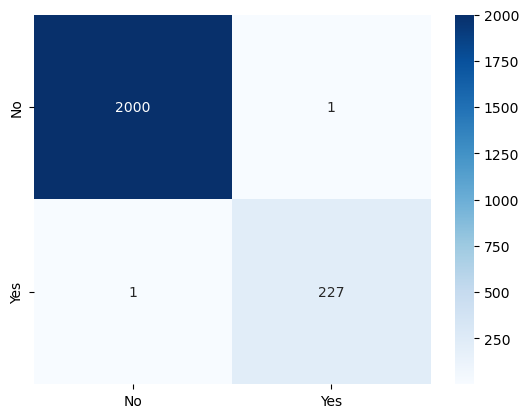

In [48]:
#ADABoost
adb_model = evaluate_model(
    "AdaBoost",
    AdaBoostClassifier(random_state=42),
    X_train_scaled, X_test_scaled, y_train, y_test
)

## Model Comparison

In [49]:
# Create comparison dataframe
comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [results[m]['accuracy'] for m in results],
    'Precision': [results[m]['precision'] for m in results],
    'Recall': [results[m]['recall'] for m in results],
    'F1-Score': [results[m]['f1'] for m in results],
    'ROC-AUC': [results[m]['roc_auc'] for m in results]
})

print("\n", comparison_df.to_string(index=False))


               Model  Accuracy  Precision   Recall  F1-Score  ROC-AUC
Logistic Regression  0.995065   0.986547 0.964912  0.975610 0.998477
      Random Forest  0.999551   1.000000 0.995614  0.997802 0.999984
  Gradient Boosting  0.999551   1.000000 0.995614  0.997802 0.999965
      Decision Tree  0.998654   1.000000 0.986842  0.993377 0.997804
                SVM  0.993271   0.977578 0.956140  0.966741      NaN
           AdaBoost  0.999103   0.995614 0.995614  0.995614 0.999616


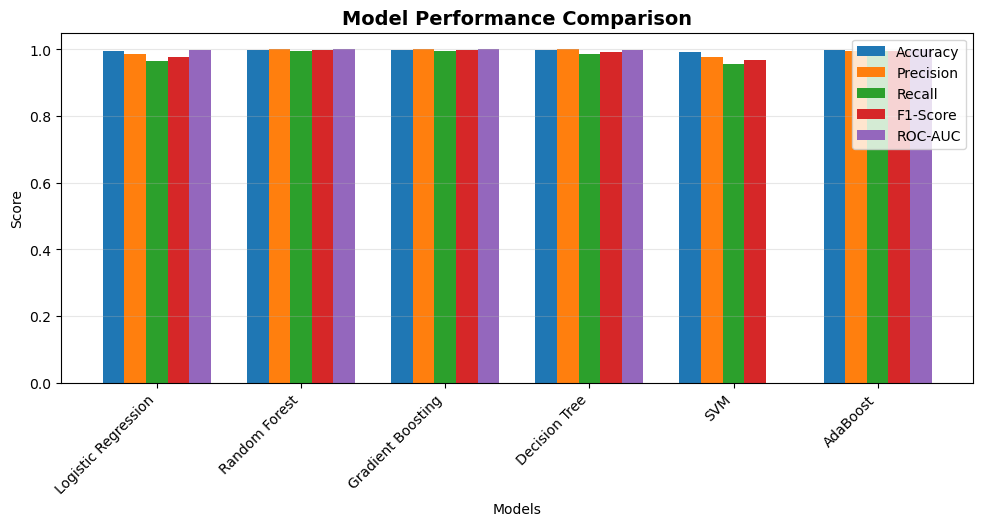

In [50]:
# Visualizations
fig = plt.figure(figsize=(40, 10))

# 1. Metrics Comparison
ax1 = plt.subplot(2, 3, 1)
metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
# Map display names to result dictionary keys
metric_keys = {
    'Accuracy': 'accuracy',
    'Precision': 'precision',
    'Recall': 'recall',
    'F1-Score': 'f1',
    'ROC-AUC': 'roc_auc'
}
x_pos = np.arange(len(results))
width = 0.15

for i, metric in enumerate(metrics_to_plot):
    key = metric_keys[metric]
    # Handle None values (replace with 0 for visualization)
    values = [results[m][key] if results[m][key] is not None else 0 for m in results]
    ax1.bar(x_pos + i*width, values, width, label=metric)

ax1.set_xlabel('Models')
ax1.set_ylabel('Score')
ax1.set_title('Model Performance Comparison', fontsize=14, fontweight='bold')
ax1.set_xticks(x_pos + width * 2)
ax1.set_xticklabels(list(results.keys()), rotation=45, ha='right')
ax1.legend()
ax1.grid(axis='y', alpha=0.3)
plt.savefig('model_1.png', dpi=300, bbox_inches='tight')

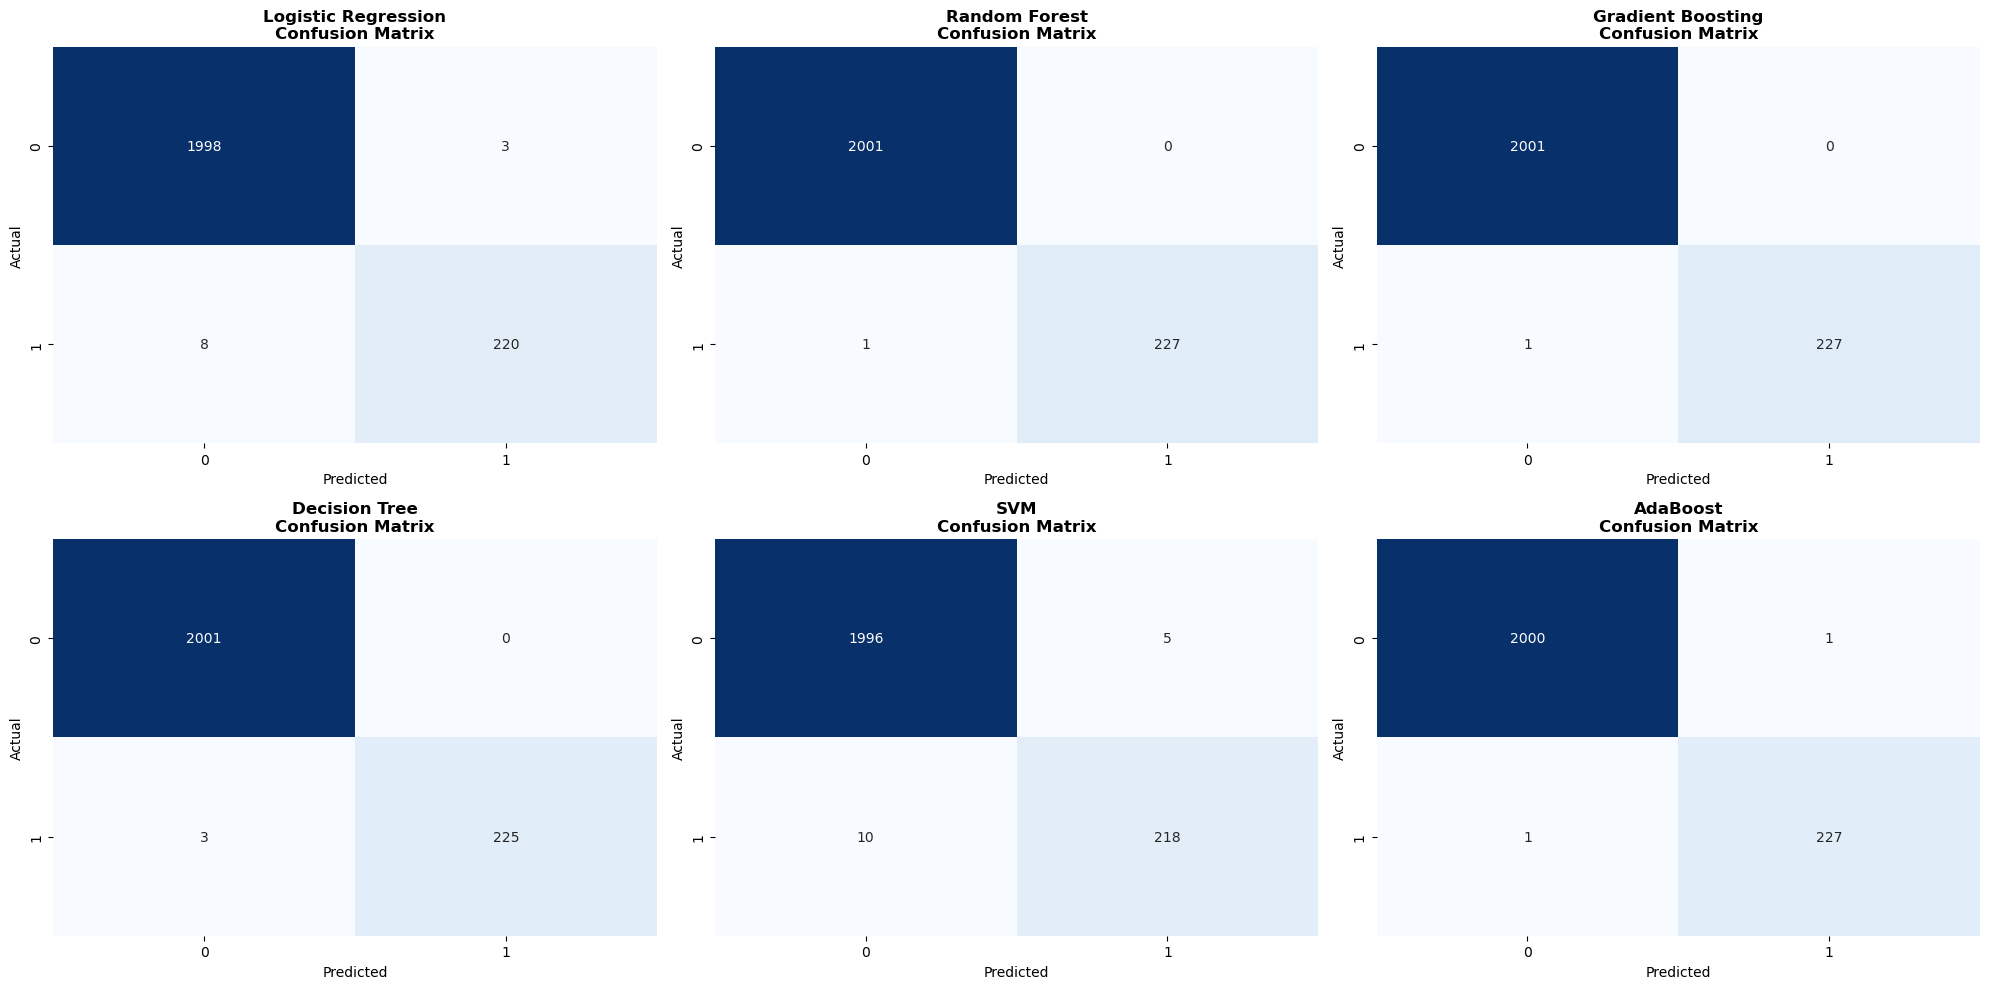

In [51]:
# 2-5. Confusion Matrices

fig = plt.figure(figsize=(20, 10))
for idx, (name, data) in enumerate(results.items(), 1):
    ax = plt.subplot(2, 3, idx)
    sns.heatmap(data['cm'], annot=True, fmt='d', cmap='Blues', cbar=False)
    ax.set_title(f'{name}\nConfusion Matrix', fontsize=12, fontweight='bold')
    ax.set_ylabel('Actual')
    ax.set_xlabel('Predicted')

plt.tight_layout() 
plt.savefig('model_2.png', dpi=300, bbox_inches='tight')

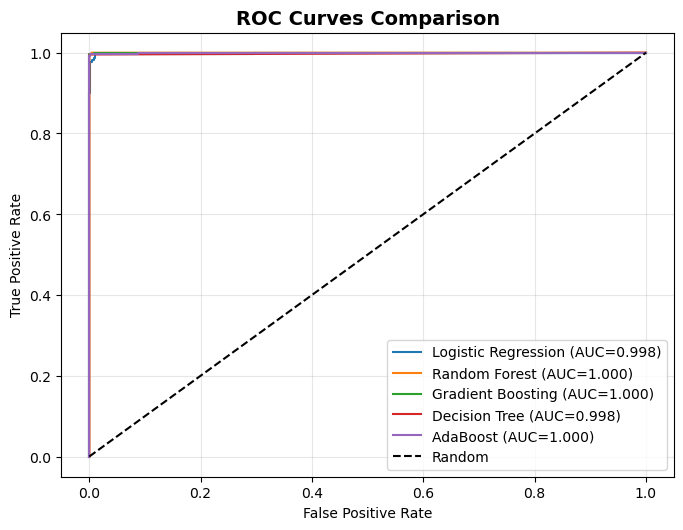

In [52]:
# 6. ROC Curves

fig = plt.figure(figsize=(20, 10))
ax6 = plt.subplot(2, 3, 6)
for name, data in results.items():
    if data['y_pred_proba'] is not None:
        fpr, tpr, _ = roc_curve(y_test, data['y_pred_proba'])
        ax6.plot(fpr, tpr, label=f"{name} (AUC={data['roc_auc']:.3f})")

ax6.plot([0, 1], [0, 1], 'k--', label='Random')
ax6.set_xlabel('False Positive Rate')
ax6.set_ylabel('True Positive Rate')
ax6.set_title('ROC Curves Comparison', fontsize=14, fontweight='bold')
ax6.legend()
ax6.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

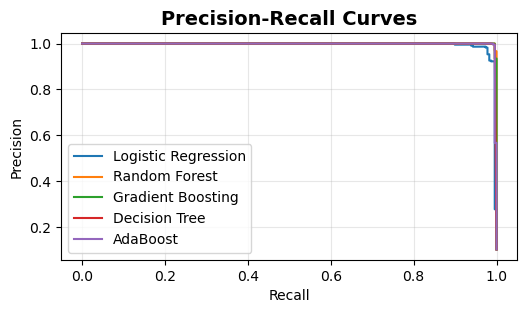

In [53]:
# 7. Precision-Recall Curves

fig = plt.figure(figsize=(20, 10))
ax7 = plt.subplot(3, 3, 7)
for name, data in results.items():
    if data['y_pred_proba'] is not None:
        precision_curve, recall_curve, _ = precision_recall_curve(y_test, data['y_pred_proba'])
        ax7.plot(recall_curve, precision_curve, label=f"{name}")

ax7.set_xlabel('Recall')
ax7.set_ylabel('Precision')
ax7.set_title('Precision-Recall Curves', fontsize=14, fontweight='bold')
ax7.legend()
ax7.grid(alpha=0.3)

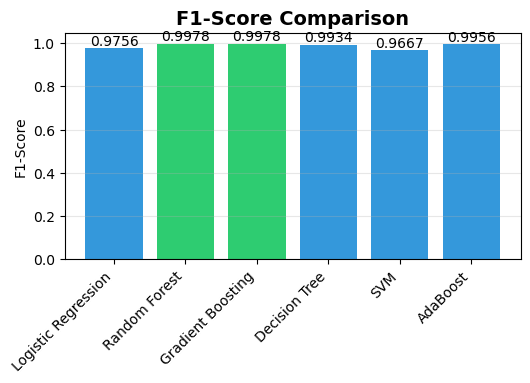

In [54]:
# 8. F1-Score Comparison

fig = plt.figure(figsize=(20, 10))
ax8 = plt.subplot(3, 3, 8)
f1_scores = [results[m]['f1'] for m in results]
colors = ['#2ecc71' if f1 == max(f1_scores) else '#3498db' for f1 in f1_scores]
bars = ax8.bar(list(results.keys()), f1_scores, color=colors)
ax8.set_ylabel('F1-Score')
ax8.set_title('F1-Score Comparison', fontsize=14, fontweight='bold')
ax8.set_xticklabels(list(results.keys()), rotation=45, ha='right')
ax8.grid(axis='y', alpha=0.3)
# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    ax8.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.4f}', ha='center', va='bottom', fontsize=10)

plt.savefig('model_3.png', dpi=300, bbox_inches='tight')

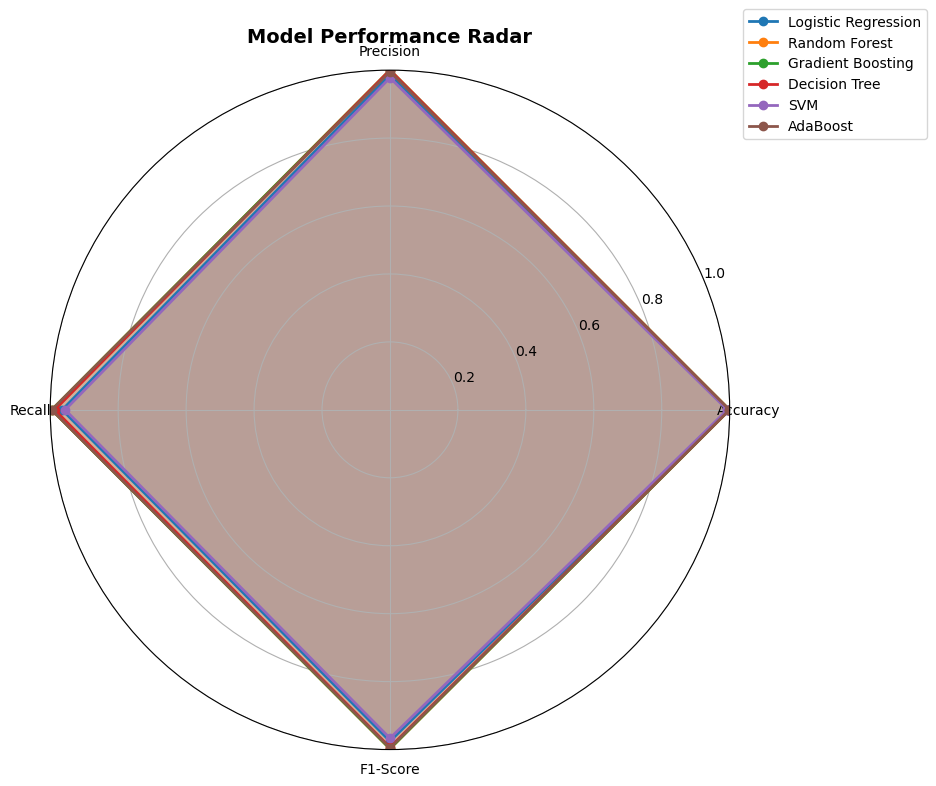

In [55]:
# 9. Model Performance Radar Chart

fig = plt.figure(figsize=(30, 30))
ax9 = plt.subplot(3, 3, 9, projection='polar')
categories = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
num_vars = len(categories)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

for name in results:
    values = [results[name]['accuracy'], results[name]['precision'], 
              results[name]['recall'], results[name]['f1']]
    values += values[:1]
    ax9.plot(angles, values, 'o-', linewidth=2, label=name)
    ax9.fill(angles, values, alpha=0.15)

ax9.set_xticks(angles[:-1])
ax9.set_xticklabels(categories)
ax9.set_ylim(0, 1)
ax9.set_title('Model Performance Radar', fontsize=14, fontweight='bold', pad=20)
ax9.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

## Financial Impact Analysis

In [56]:
# Assumptions
avg_transaction_value = fd['amount'].median()
fraud_loss_per_transaction = avg_transaction_value
investigation_cost = 50  # Cost to investigate a flagged transaction
prevented_fraud_recovery = 0.9  # 90% recovery on prevented fraud

print(f"\nAssumptions:")
print(f"  Average Transaction Value: ${avg_transaction_value:,.2f}")
print(f"  Fraud Loss per Transaction: ${fraud_loss_per_transaction:,.2f}")
print(f"  Investigation Cost: ${investigation_cost:,.2f}")
print(f"  Fraud Recovery Rate: {prevented_fraud_recovery*100:.0f}%")


Assumptions:
  Average Transaction Value: $16,761.26
  Fraud Loss per Transaction: $16,761.26
  Investigation Cost: $50.00
  Fraud Recovery Rate: 90%


In [57]:
financial_results = {}

for name, data in results.items():
    cm = data['cm']
    tn, fp, fn, tp = cm.ravel()
    
    # Calculate financial metrics
    losses_from_missed_frauds = fn * fraud_loss_per_transaction
    investigation_costs = fp * investigation_cost
    prevented_fraud_value = tp * fraud_loss_per_transaction * prevented_fraud_recovery
    
    net_benefit = prevented_fraud_value - investigation_costs - losses_from_missed_frauds
    
    financial_results[name] = {
        'Prevented Fraud Value': prevented_fraud_value,
        'Investigation Costs': investigation_costs,
        'Losses from Missed Frauds': losses_from_missed_frauds,
        'Net Benefit': net_benefit
    }
    
    print(f"\n{name}:")
    print(f"  True Positives (Caught Frauds): {tp:,}")
    print(f"  False Positives (False Alarms): {fp:,}")
    print(f"  False Negatives (Missed Frauds): {fn:,}")
    print(f"  Prevented Fraud Value: ${prevented_fraud_value:,.2f}")
    print(f"  Investigation Costs: ${investigation_costs:,.2f}")
    print(f"  Losses from Missed Frauds: ${losses_from_missed_frauds:,.2f}")
    print(f"  NET BENEFIT: ${net_benefit:,.2f}")


Logistic Regression:
  True Positives (Caught Frauds): 220
  False Positives (False Alarms): 3
  False Negatives (Missed Frauds): 8
  Prevented Fraud Value: $3,318,729.48
  Investigation Costs: $150.00
  Losses from Missed Frauds: $134,090.08
  NET BENEFIT: $3,184,489.40

Random Forest:
  True Positives (Caught Frauds): 227
  False Positives (False Alarms): 0
  False Negatives (Missed Frauds): 1
  Prevented Fraud Value: $3,424,325.42
  Investigation Costs: $0.00
  Losses from Missed Frauds: $16,761.26
  NET BENEFIT: $3,407,564.16

Gradient Boosting:
  True Positives (Caught Frauds): 227
  False Positives (False Alarms): 0
  False Negatives (Missed Frauds): 1
  Prevented Fraud Value: $3,424,325.42
  Investigation Costs: $0.00
  Losses from Missed Frauds: $16,761.26
  NET BENEFIT: $3,407,564.16

Decision Tree:
  True Positives (Caught Frauds): 225
  False Positives (False Alarms): 0
  False Negatives (Missed Frauds): 3
  Prevented Fraud Value: $3,394,155.15
  Investigation Costs: $0.00


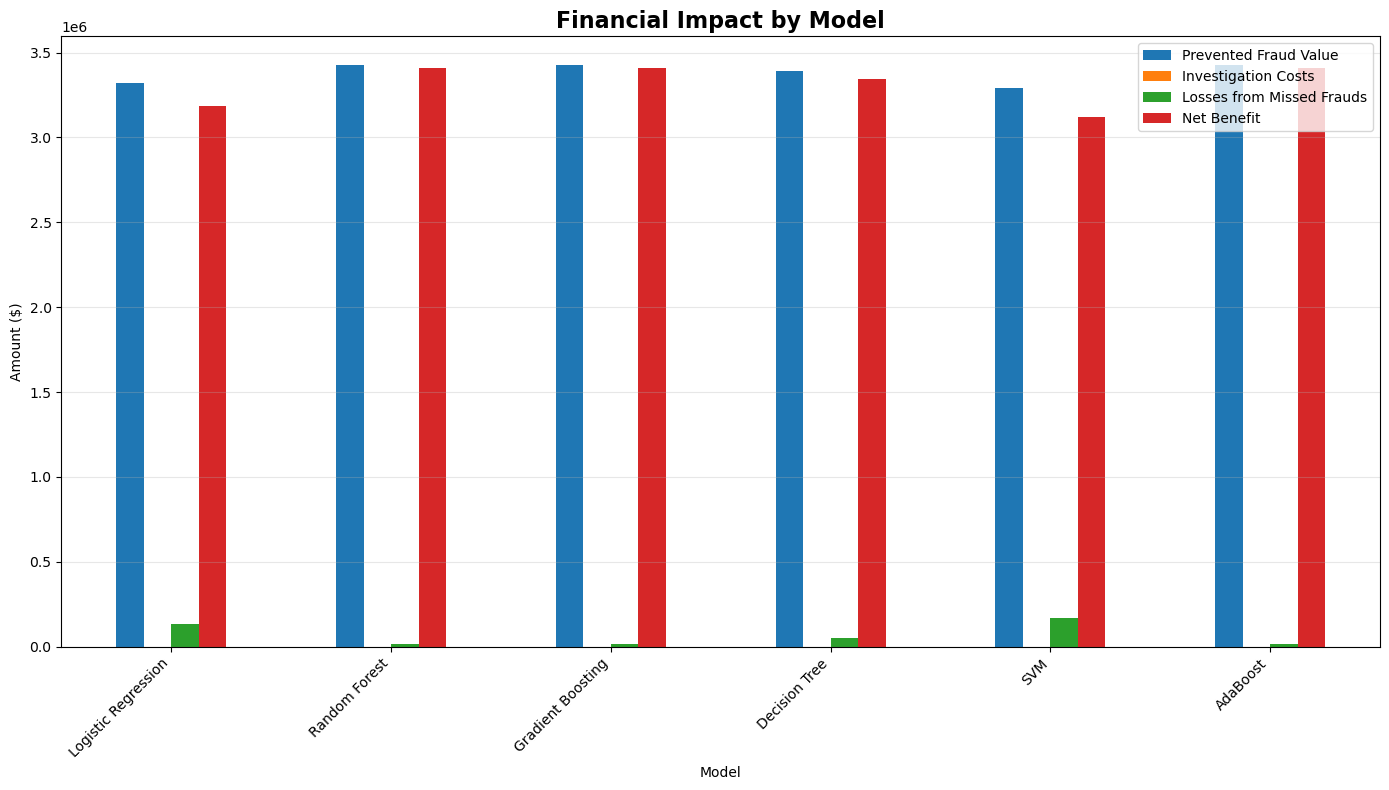

In [58]:
# Financial comparison chart
fig, ax = plt.subplots(figsize=(14, 8))
financial_df = pd.DataFrame(financial_results).T
financial_df[['Prevented Fraud Value', 'Investigation Costs', 
              'Losses from Missed Frauds', 'Net Benefit']].plot(kind='bar', ax=ax)
plt.title('Financial Impact by Model', fontsize=16, fontweight='bold')
plt.xlabel('Model')
plt.ylabel('Amount ($)')
plt.xticks(rotation=45, ha='right')
plt.legend(loc='best')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('financial_impact.png', dpi=300, bbox_inches='tight')
plt.show()

## Feature Importance (Best Model)

In [59]:
# Select best model based on F1-score
best_model_name = max(results, key=lambda x: results[x]['f1'])
best_model = results[best_model_name]['model']

print(f"\nBest Model: {best_model_name}")
print(f"F1-Score: {results[best_model_name]['f1']:.4f}")


Best Model: Random Forest
F1-Score: 0.9978



Top 15 Most Important Features:
                  Feature  Importance
                     step    0.287367
      orig_balance_change    0.123201
       error_balance_orig    0.109123
amount_to_oldbalance_orig    0.108811
                 hour_sin    0.082330
           newbalanceOrig    0.068550
              is_merchant    0.040019
amount_to_oldbalance_dest    0.033999
             type_PAYMENT    0.029192
            oldbalanceOrg    0.020758
                 hour_cos    0.018273
                   amount    0.015973
            type_TRANSFER    0.012358
      dest_balance_change    0.011461
       error_balance_dest    0.009839


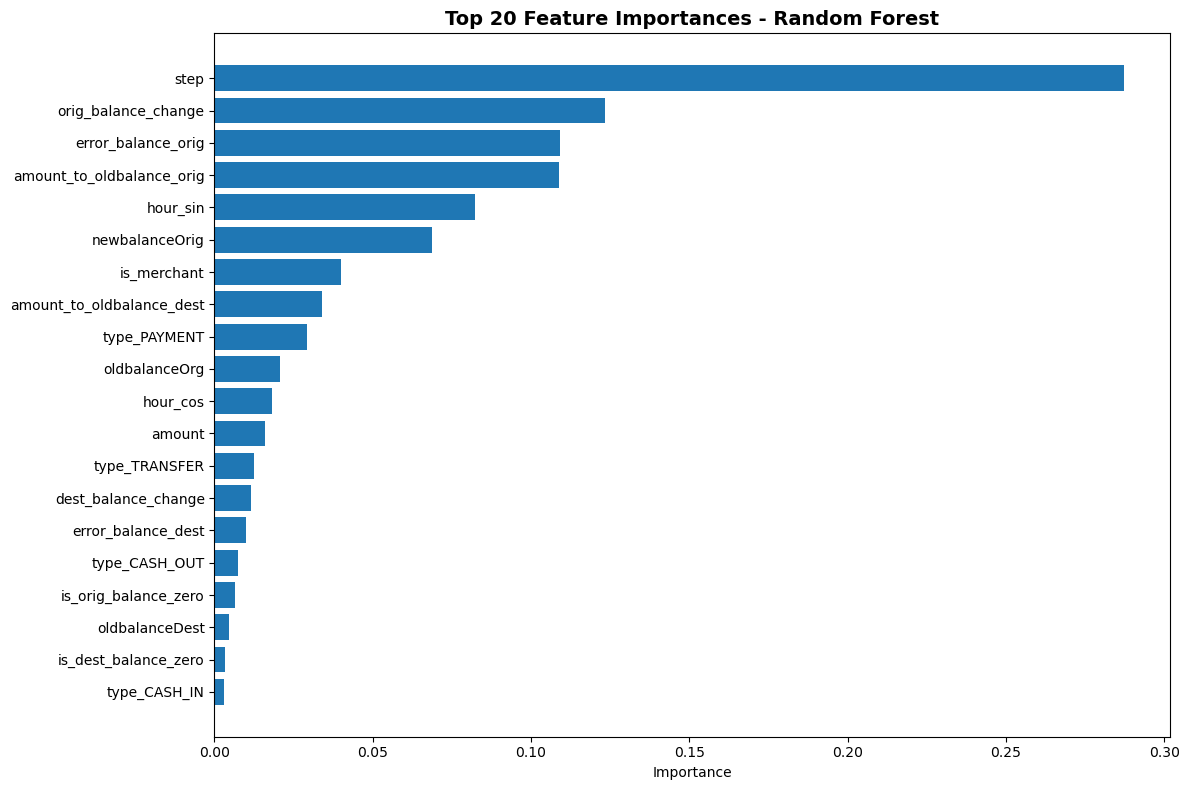

In [60]:
# Get feature importance
if hasattr(best_model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'Feature': feature_cols,
        'Importance': best_model.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    print(f"\nTop 15 Most Important Features:")
    print(feature_importance.head(15).to_string(index=False))
    
    # Plot feature importance
    plt.figure(figsize=(12, 8))
    top_features = feature_importance.head(20)
    plt.barh(range(len(top_features)), top_features['Importance'])
    plt.yticks(range(len(top_features)), top_features['Feature'])
    plt.xlabel('Importance')
    plt.title(f'Top 20 Feature Importances - {best_model_name}', 
              fontsize=14, fontweight='bold')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

## FInal Reccomendations

In [61]:
print(f"""
1. MODEL SELECTION:
   - Recommended Model: {best_model_name}
   - This model achieves the best balance between precision and recall
   - F1-Score: {results[best_model_name]['f1']:.4f}
   - ROC-AUC: {results[best_model_name]['roc_auc']:.4f}

2. KEY INSIGHTS:
   - Fraud occurs primarily in TRANSFER and CASH_OUT transactions
   - Fraudulent transactions show distinctive balance change patterns
   - Error features (balance inconsistencies) are strong fraud indicators

3. BUSINESS IMPACT:
   - Net Benefit: ${financial_results[best_model_name]['Net Benefit']:,.2f}
   - Prevented Fraud: ${financial_results[best_model_name]['Prevented Fraud Value']:,.2f}
   - Investigation Cost: ${financial_results[best_model_name]['Investigation Costs']:,.2f}

4. IMPLEMENTATION RECOMMENDATIONS:
   - Deploy model for real-time transaction scoring
   - Set appropriate threshold based on risk tolerance
   - Implement automated flagging for high-risk transactions
   - Regular model retraining with new fraud patterns
   - Human review process for flagged transactions

5. MONITORING:
   - Track model performance metrics weekly
   - Monitor false positive rate to optimize investigation costs
   - Update feature engineering based on new fraud patterns
   - A/B test model improvements before full deployment
""")



1. MODEL SELECTION:
   - Recommended Model: Random Forest
   - This model achieves the best balance between precision and recall
   - F1-Score: 0.9978
   - ROC-AUC: 1.0000

2. KEY INSIGHTS:
   - Fraud occurs primarily in TRANSFER and CASH_OUT transactions
   - Fraudulent transactions show distinctive balance change patterns
   - Error features (balance inconsistencies) are strong fraud indicators

3. BUSINESS IMPACT:
   - Net Benefit: $3,407,564.16
   - Prevented Fraud: $3,424,325.42
   - Investigation Cost: $0.00

4. IMPLEMENTATION RECOMMENDATIONS:
   - Deploy model for real-time transaction scoring
   - Set appropriate threshold based on risk tolerance
   - Implement automated flagging for high-risk transactions
   - Regular model retraining with new fraud patterns
   - Human review process for flagged transactions

5. MONITORING:
   - Track model performance metrics weekly
   - Monitor false positive rate to optimize investigation costs
   - Update feature engineering based on new 